# Machine Learning Models

### Decision Tree Classifier

In [332]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
finaldata[columns_to_scale] = StandardScaler.fit_transform(finaldata[columns_to_scale])
finaldata

/var/folders/1g/75xw4_yd4y93hrkvk96kpybr0000gn/T/ipykernel_54944/1730133101.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.994256,1,3,1.068702,-0.200262,1,0,-0.002825,0,1.375268,0,0,1,1
1,-1.838554,1,2,0.047579,0.181201,0,1,1.617529,0,2.576519,0,0,2,1
2,-1.402737,0,1,0.047579,-0.850993,0,0,0.960628,0,0.474329,2,0,2,1
3,0.231577,1,1,-0.633170,-0.132945,0,1,1.223388,0,-0.126296,2,0,2,1
4,0.340531,0,0,-0.633170,2.514857,0,1,0.566488,1,-0.326505,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.340531,0,0,0.728328,-0.020750,0,1,-1.185246,1,-0.726922,1,0,3,0
299,-0.966920,1,3,-1.313918,0.495347,0,1,-0.791106,0,0.274121,1,0,3,0
300,1.539027,1,0,1.000628,-1.097822,1,1,-0.396966,0,2.476415,1,2,3,0
301,0.340531,1,0,0.047579,-2.489040,0,1,-1.535593,1,0.274121,1,1,3,0


We need to scale the continuous variables in our data first to ensure that variables with larger numerical values don't dominate the model and have a disproportionate influence on the outcome.

In [333]:
X= finaldata.drop(['target'], axis=1)
y= finaldata['target']

In [334]:
arr=[]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)
#30% of the data is stored in test and 70% in train
from sklearn.tree import DecisionTreeClassifier
dt_zoo = []
for i in range (0,1000): #We are checking the accuracy of models having max depth from 1-1000 
    dt=DecisionTreeClassifier(max_depth=i+1)
    dt.fit(X_train,y_train)
    dt_zoo.append(dt)
    y_pred=dt.predict(X_test)#prediction on X_test
    accuracy_dt=accuracy_score(y_test,y_pred)*100
    arr.append(accuracy_dt)#Storing the accuracy of all the models in the array 'arr'
maxi=0;
for i in range (0,999):
    if arr[i]>maxi:
        maxi=arr[i]#Finding the model having the maximum accuracy to predict the data
        term=i
        max_dt=dt_zoo[i]
print('The maximum and best accuracy for all trees having depths between 1-1000 is',maxi,'%')
print('The depth of the tree having the best accuracy score is:',max_dt)

The maximum and best accuracy for all trees having depths between 1-1000 is 80.95238095238095 %
The depth of the tree having the best accuracy score is: DecisionTreeClassifier(max_depth=42)


In [335]:
#THIS IS THE CODE FOR MAKING THE TREE: WE WILL ASK THE TA IF HE NEEDS IT
#from sklearn.tree import plot_tree

#f = plt.figure(figsize=(12,12))
#plot_tree(max_dt, filled=True, rounded=True)

In [336]:
print("Accuracy on training set: {:.3f}".format(max_dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(max_dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.810


### Based on the accuracy score, the Decision Tree Classification model has an accuracy score of 81.0% in correctly predicting heart disease 

### Now we try to find the most important feature in the Decision Tree Classifier

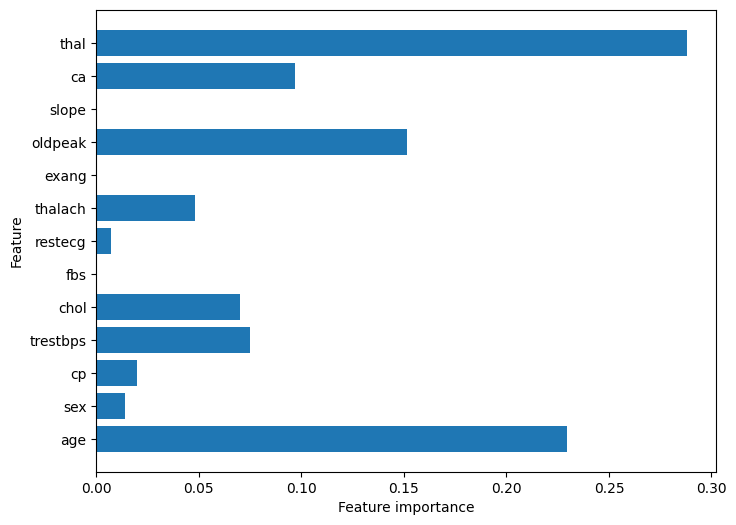

In [337]:
def plot_feature_importances_hd(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_hd(max_dt)
plt.savefig('feature_importance')

### Based on the barplot above, we can deduce that thal has the greatest importance in predicting heart disease based on the decision tree classification model.

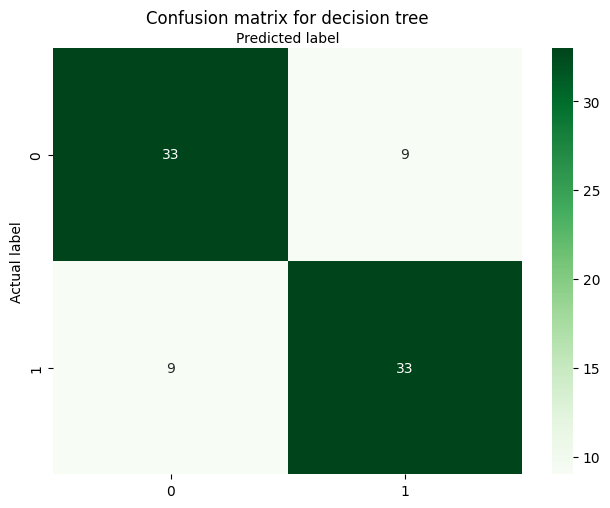

In [338]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for decision tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

The Confusion Matrix True Positive value is 33 and true Negative is 33. And the False Positive came out to be 9 and False Negative is 9.

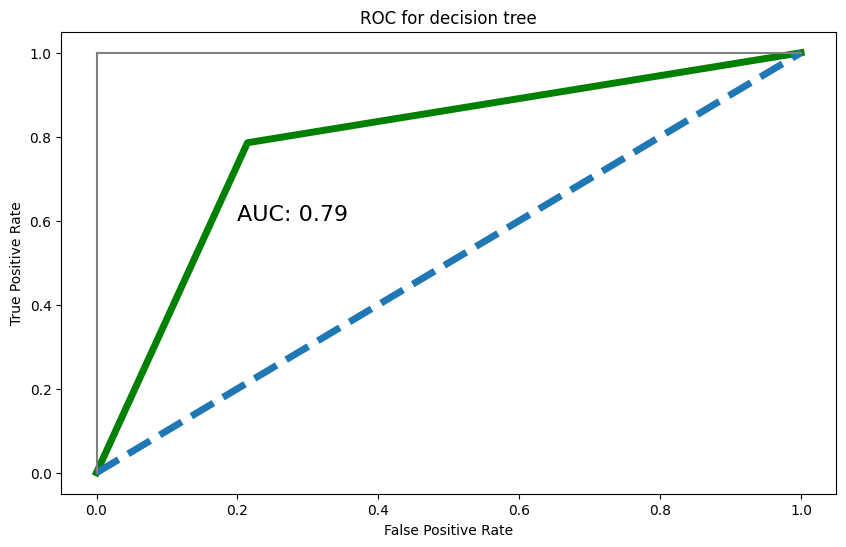

In [339]:
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

ROC Curves summarizes the trade-off between the true positive rate and the false positive rate for the predictive model using different probability thresholds.

The accuracy of the ROC curve came out to be 79%.

In [340]:
sklearn.metrics.roc_auc_score(y_test,y_pred)*100

78.57142857142856

### K-Nearest Neighbours Classification Model

In [341]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

In [342]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)
k_range=range(1,26)
scores={}
h_score = 0       # to find the best score
best_k=0          # to find the best k
scores_list=[]  

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(y_test,prediction_knn))
print('The best value of k is {} with score : {}'.format(best_k,h_score))

The best value of k is 14 with score : 0.8214285714285714


In [343]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [344]:
prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
print('accuracy_score score     : ',accuracy_score(y_test,prediction_knn)*100,'%')
print('mean_squared_error score : ',mean_squared_error(y_test,prediction_knn)*100,'%')

accuracy_score score     :  82.14285714285714 %
mean_squared_error score :  17.857142857142858 %


### The KNN model has an accuracy score of 82.1% in correctly predicting the Heart Disease

### Now we try to find the most important feature in the KNN Model. To do this, we used the permutation feature importance method provided by sci-kit-learn. This method works by randomly permuting the values of each feature and then measuring how much the performance of the KNN algorithm decreases as a result. The larger the decrease in performance, the more important the feature is considered to be.

In [345]:
result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)
print(result.importances_mean)

[-0.0202381   0.00595238  0.07857143 -0.00238095  0.01190476  0.00952381
 -0.01071429  0.02380952  0.01904762  0.03214286  0.00714286  0.05
  0.01190476]


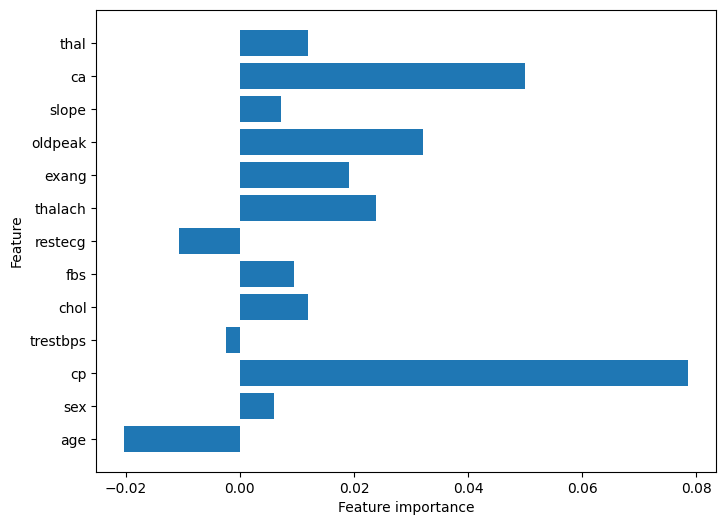

In [346]:
def plot_feature_importances_hd(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), result.importances_mean, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_hd(knn)
plt.savefig('feature_importance')

### Based on the barplot above, "cp" is the most important feature in predicting heart diseases using the KNN model. "restecg","trestbps","age" has a negative permutation feature importance score. This means that permuting the feature has no effect on the model's performance or the model is not relying on that feature to make accurate predictions, or the feature may be harming the model's performance. 

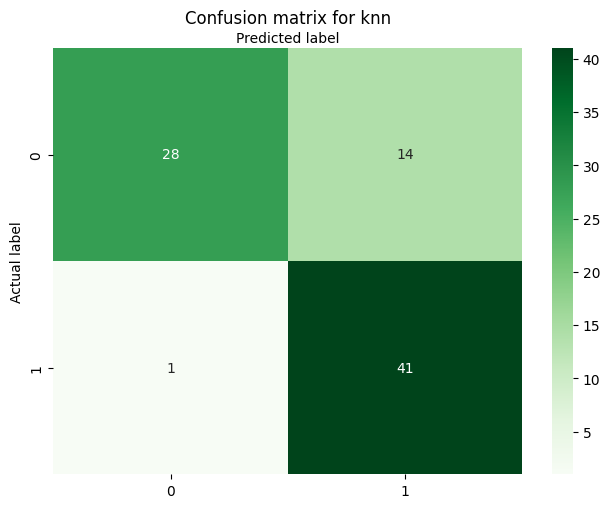

In [347]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,prediction_knn)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for knn')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

The Confusion Matrix True Positive value is 41 and true Negative is 28. And the False Positive came out to be 1 and False Negative is 14.

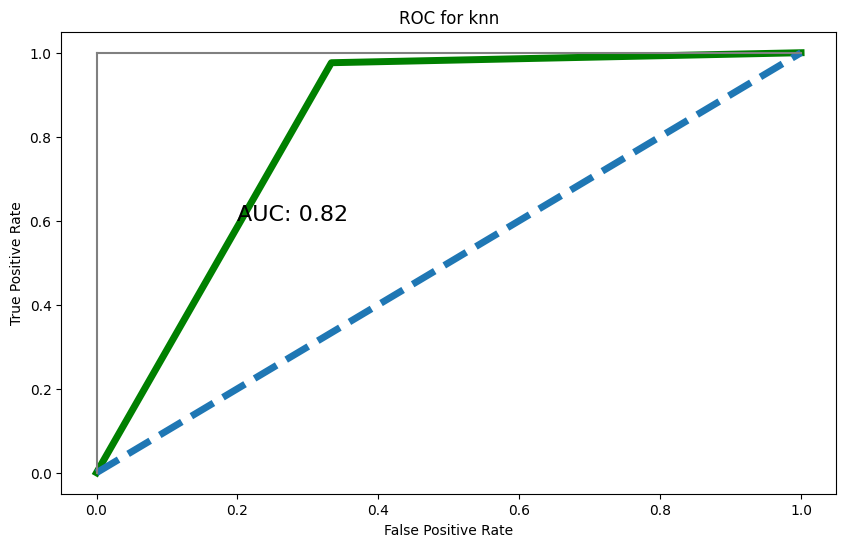

In [348]:
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,prediction_knn)
plt.figure(figsize=(10,6))
plt.title('ROC for knn')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,prediction_knn)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

ROC Curves summarizes the trade-off between the true positive rate and the false positive rate for the predictive model using different probability thresholds.

The accuracy of the ROC curve came out to be 82%.

In [349]:
sklearn.metrics.roc_auc_score(y_test,prediction_knn)*100

82.14285714285715

### Logistic Regression Model

In [350]:
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=6,test_size=0.3,shuffle=True)
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_prediction = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test,lr_prediction)*100
print("Accuracy Score for Logistic Regression model is:",lr_accuracy,'%')

Accuracy Score for Logistic Regression model is: 86.90476190476191 %


In [351]:
print('mean_squared_error score : ',mean_squared_error(y_test,lr_prediction)*100,'%')

mean_squared_error score :  13.095238095238097 %


### The accuracy score of the Logistic Regression model in predicting heart disease is 86.90%

### Now we try to find the most important feature in the Logistic Regression Model. We do this using the coefficient value corresponding with each feature that reflects the features impact on the target variable. Features with higher absolute coefficient values are considered more important.

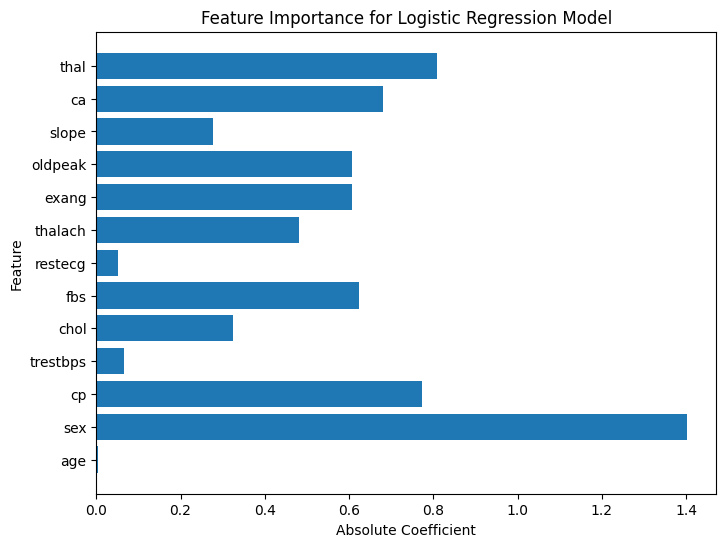

In [352]:
n_features = 13
plt.figure(figsize=(8,6))
coefs = np.abs(lr.coef_)[0]
plt.barh(range(n_features), coefs)
plt.yticks(np.arange(n_features), X)
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance for Logistic Regression Model')
plt.show()

### Based on the barplot above, we can deduce that the variable "sex" has the highest coefficient and hence has the highest feature importance with regards to predicting heart disease.

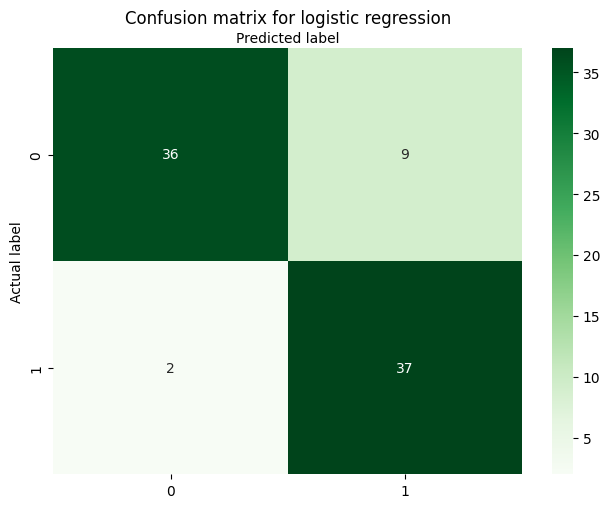

In [353]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,lr_prediction)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for logistic regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

The Confusion Matrix True Positive value is 37 and true Negative is 36. And the False negative came out to be 9 and False positive is 2.

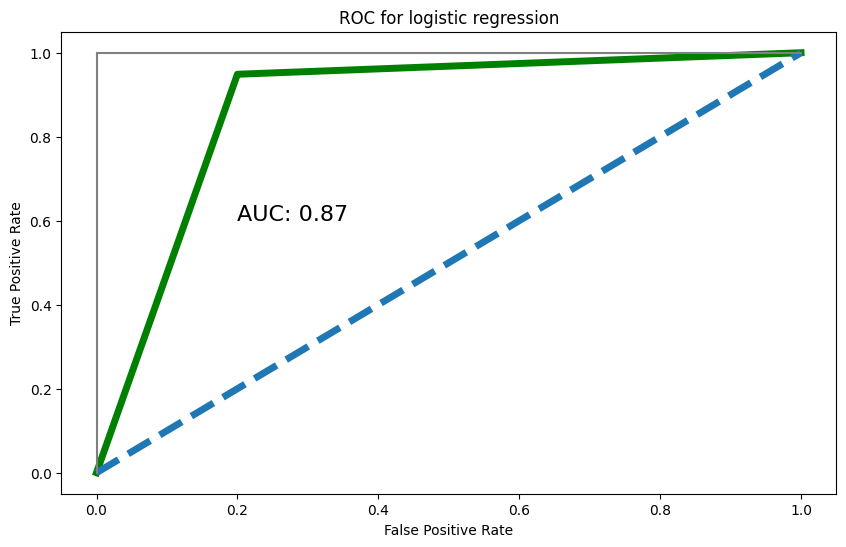

In [354]:
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate_knn, true_positive_rate_knn, threshold_knn = roc_curve(y_test,lr_prediction)
plt.figure(figsize=(10,6))
plt.title('ROC for logistic regression')
plt.plot(false_positive_rate_knn, true_positive_rate_knn, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,lr_prediction)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

ROC Curves summarizes the trade-off between the true positive rate and the false positive rate for the predictive model using different probability thresholds.

The accuracy of the ROC curve came out to be 87%.

In [355]:
sklearn.metrics.roc_auc_score(y_test,lr_prediction)*100

87.43589743589743

## Random Forest Classifier

In [356]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
score = rf.score(X_train, y_train)
print('Training Score:', score)
score = rf.score(X_test, y_test)
print('Testing Score:', score)
rf_accuracy = accuracy_score(rf_pred,y_test)*100
print(f"Accuracy: {rf_accuracy:}",'%')

Training Score: 1.0
Testing Score: 0.8095238095238095
Accuracy: 80.95238095238095 %


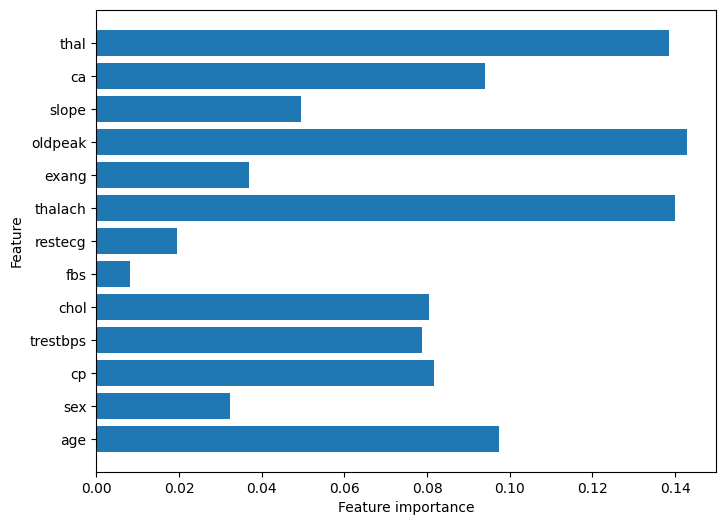

In [357]:
def plot_feature_importances_hd(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), rf.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_hd(rf)
plt.savefig('feature_importance')

### Based on the barplot above, we can deduce that the variable "thal" has the highest coefficient and hence has the highest feature importance with regards to predicting heart disease. 

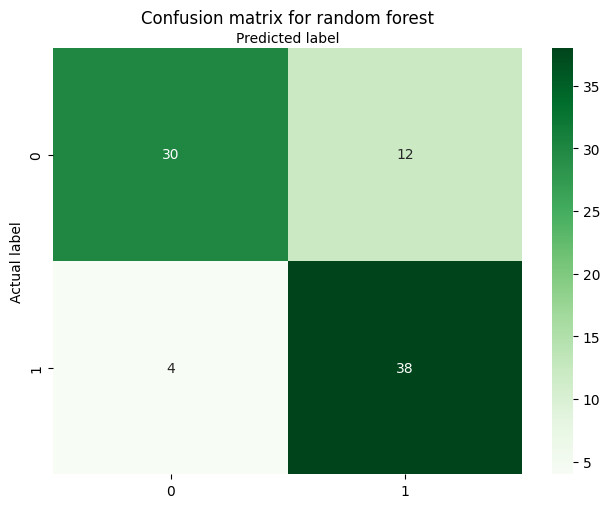

In [358]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,rf_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for random forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

The Confusion Matrix True Positive value is 38 and true Negative is 30. And the False Positive came out to be 4 and False Negative is 12.

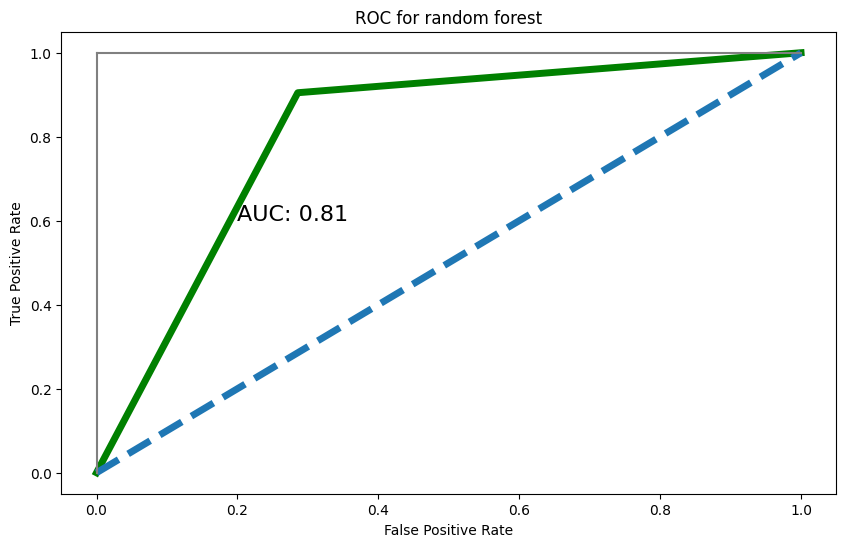

In [359]:
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,rf_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,rf_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

ROC Curves summarizes the trade-off between the true positive rate and the false positive rate for the predictive model using different probability thresholds.

The accuracy of the ROC curve came out to be 81%.

In [360]:
sklearn.metrics.roc_auc_score(y_test,rf_pred)*100

80.95238095238095

# Neural Network Model

In [361]:
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [362]:
# Rename columns into lowercase characters
data.columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

In [363]:
# Split the dataset into input (X) and target (y) variables
X = finaldata.drop("target", axis=1)
y = finaldata["target"]

#Splitting the data into test(80% of the data) and train(20% of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [364]:
def modelfunc(lr):
    # Create the neural network model
    model = Sequential() #creates a neural network model using the Keras Sequential API

    #The first layer is a Dense layer with 64 neurons, which takes the input data with input dimension equal to the number of features
    #in the X_train dataset. The activation function used in this layer is the rectified linear unit (ReLU) activation function.
    model.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))

    #The second layer is another Dense layer with 32 neurons and the ReLU activation function.
    model.add(Dense(32, activation="relu"))

    #The final layer is a Dense layer with a single neuron and the sigmoid activation function. This is because the problem 
    #is a binary classification problem, so the output of the model will be a probability between 0 and 1,
    #which represents the probability of a patient having heart disease.
    model.add(Dense(1, activation="sigmoid"))

    #The optimizer used in this model is the Adam optimizer, which is a popular stochastic gradient descent optimization algorithm. 
    #The learning rate for the optimizer is set to 0.001.
    opt = optimizers.Adam(learning_rate=lr)

    # Compile the neural network model using the "binary_crossentropy" loss function, the "opt" optimizer, 
    #and "accuracy" as the evaluation metric.

    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

    # The "binary_crossentropy" loss function is typically used for binary classification problems, where the goal 
    # is to predict between two classes(here the target variable). It measures the difference between the predicted probability 
    # distribution and the actual probability distribution of the binary target variable.
    
    return model

In [365]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint filename
lr = 0.0678
checkpoint_filepath = f'best_model_{lr}.h5'

# Create a ModelCheckpoint callback to save the weights with the highest validation accuracy
checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

model = modelfunc(lr)
model.fit(
    X_train, y_train,
    epochs=60,
    batch_size=32,
    validation_split=0.1,
    verbose=0,
    callbacks=[checkpoint] # Add the checkpoint callback here
)




Epoch 1: val_accuracy improved from -inf to 0.60870, saving model to best_model_0.0678.h5

Epoch 2: val_accuracy improved from 0.60870 to 0.69565, saving model to best_model_0.0678.h5

Epoch 3: val_accuracy improved from 0.69565 to 0.82609, saving model to best_model_0.0678.h5

Epoch 4: val_accuracy did not improve from 0.82609

Epoch 5: val_accuracy did not improve from 0.82609

Epoch 6: val_accuracy did not improve from 0.82609

Epoch 7: val_accuracy did not improve from 0.82609

Epoch 8: val_accuracy did not improve from 0.82609

Epoch 9: val_accuracy did not improve from 0.82609

Epoch 10: val_accuracy did not improve from 0.82609

Epoch 11: val_accuracy did not improve from 0.82609

Epoch 12: val_accuracy did not improve from 0.82609

Epoch 13: val_accuracy did not improve from 0.82609

Epoch 14: val_accuracy did not improve from 0.82609

Epoch 15: val_accuracy did not improve from 0.82609

Epoch 16: val_accuracy did not improve from 0.82609

Epoch 17: val_accuracy did not improv

In [366]:
model.load_weights(checkpoint_filepath)
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

2/2 [==============================] - 0s 2ms/step - loss: 1.1228 - accuracy: 0.8750


In [367]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0) 

'''The model.evaluate() function will compute the loss function and the accuracy metric of the trained model on the test set, 
and return these values as a tuple. The verbose argument controls the amount of output that will be printed during the 
evaluation process, and if verbose is set to 0, the function will not print any output during the evaluation.'''

print(f"Accuracy: {accuracy:.2f}") #Printing the accuracy of the neural network used to predict the target value
print(loss)#Prints the loss 

Accuracy: 0.88
1.1227539777755737


In [368]:
acc_list = []
acc_list.append(accuracy_knn)
acc_list.append(lr_accuracy)
acc_list.append(rf_accuracy)
acc_list.append(maxi)
acc_list.append(accuracy*100)
print(acc_list)

[82.14285714285714, 86.90476190476191, 80.95238095238095, 80.95238095238095, 87.5]


In [369]:
models = ["KNN","Logistic Regression","Random Forest","Decision Tree Classifier","Neural Network"]

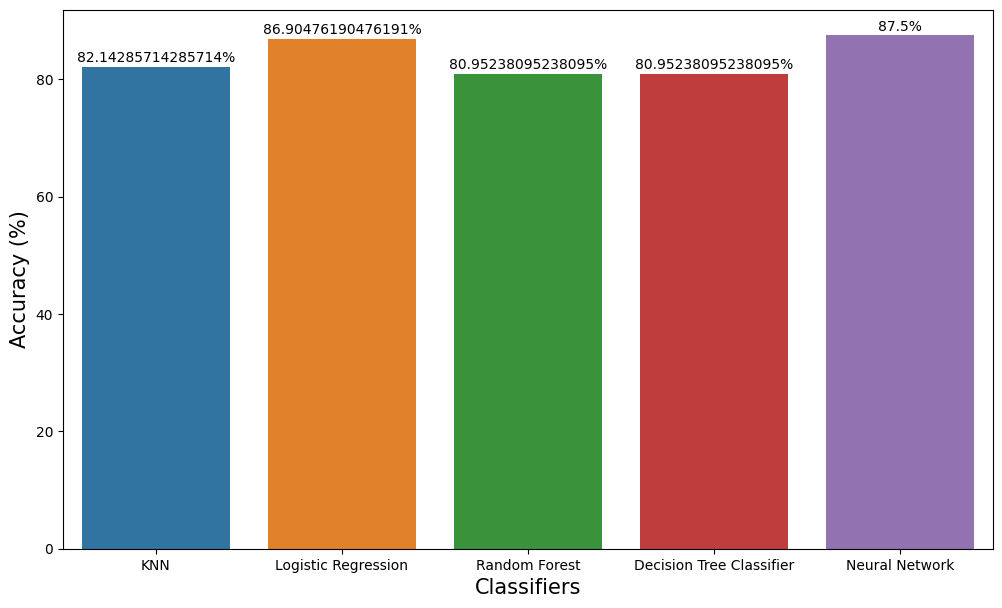

In [370]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=models,y=acc_list)
plt.xlabel("Classifiers", fontsize = 15)
plt.ylabel("Accuracy (%)", fontsize = 15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height}%",(x+ width/2,y+ height*1.01),ha="center")